Import Libraries:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# import numba currently unused, will implement if necessary
import time

Define Runge-Kutta-Fehlberg Method:

Values taken from: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta%E2%80%93Fehlberg_method "COEFFICIENTS FOR RK4(5), FORMULA 2 Table III in Fehlberg"

In [8]:
def rkf( f, a, b, x0, tol, hmax, hmin ):

    # RK4(5) Fehlberg Coefficients
    a2  =   2.500000000000000e-01  #  1/4
    a3  =   3.750000000000000e-01  #  3/8
    a4  =   9.230769230769231e-01  #  12/13
    a5  =   1.000000000000000e+00  #  1
    a6  =   5.000000000000000e-01  #  1/2

    b21 =   2.500000000000000e-01  #  1/4
    b31 =   9.375000000000000e-02  #  3/32
    b32 =   2.812500000000000e-01  #  9/32
    b41 =   8.793809740555303e-01  #  1932/2197
    b42 =  -3.277196176604461e+00  # -7200/2197
    b43 =   3.320892125625853e+00  #  7296/2197
    b51 =   2.032407407407407e+00  #  439/216
    b52 =  -8.000000000000000e+00  # -8
    b53 =   7.173489278752436e+00  #  3680/513
    b54 =  -2.058966861598441e-01  # -845/4104
    b61 =  -2.962962962962963e-01  # -8/27
    b62 =   2.000000000000000e+00  #  2
    b63 =  -1.381676413255361e+00  # -3544/2565
    b64 =   4.529727095516569e-01  #  1859/4104
    b65 =  -2.750000000000000e-01  # -11/40

    r1  =   2.777777777777778e-03  #  1/360
    r3  =  -2.994152046783626e-02  # -128/4275
    r4  =  -2.919989367357789e-02  # -2197/75240
    r5  =   2.000000000000000e-02  #  1/50
    r6  =   3.636363636363636e-02  #  2/55

    c1  =   1.157407407407407e-01  #  25/216
    c3  =   5.489278752436647e-01  #  1408/2565
    c4  =   5.353313840155945e-01  #  2197/4104
    c5  =  -2.000000000000000e-01  # -1/5
    
    # Initialisation
    t = a
    x = np.array(x0)
    h = hmax

    T = np.array( [t] )
    X = np.array( [x] )
    
    # Update Loop
    while t < b:

        if t + h > b:
            h = b - t

        k1 = h * f( x, t )
        k2 = h * f( x + b21 * k1, t + a2 * h )
        k3 = h * f( x + b31 * k1 + b32 * k2, t + a3 * h )
        k4 = h * f( x + b41 * k1 + b42 * k2 + b43 * k3, t + a4 * h )
        k5 = h * f( x + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4, t + a5 * h )
        k6 = h * f( x + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5, \
                    t + a6 * h )

        r = abs( r1 * k1 + r3 * k3 + r4 * k4 + r5 * k5 + r6 * k6 ) / h
        if len( np.shape( r ) ) > 0:
            r = max( r )
        if r <= tol:
            t = t + h
            x = x + c1 * k1 + c3 * k3 + c4 * k4 + c5 * k5
            T = np.append( T, t )
            X = np.append( X, [x], 0 )

        h = h * min( max( 0.84 * ( tol / r )**0.25, 0.1 ), 4.0 )

        if h > hmax:
            h = hmax
        elif h < hmin:
            raise RuntimeError("Error: Could not converge to the required tolerance %e with minimum stepsize  %e." % (tol,hmin))
            break

    return ( T, X )

In [9]:
def data_gen(t_final = 100, gamma = 0.37, x0=[1,0]):
    beta = 1
    alpha  = -1
    delta = .3
    omega = 1.2
    def V(u,t):
        x, dx = u
        ddx=  gamma * np.cos(omega * t) - (delta * dx + alpha*x + beta * x**3)
        return np.array([dx,ddx])
    # Timing the Simulation
    start_time = time.time()
    t, u  = rkf( f=V, a=0, b=t_final, x0=x0, tol=1e-6, hmax=1e1, hmin=1e-16 )
    print("Execution time:",time.time() - start_time, "seconds")
    return np.array([t[-1], u[0][0], u[0][1], u[-1][0], u[-1][1]])





Running the Simulation with conditions detailed in: https://en.wikipedia.org/wiki/Duffing_equation under examples

Plotting the Phase Portrait:

Execution time: 0.06888461112976074 seconds


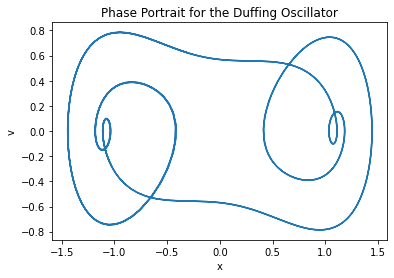

Execution time: 0.06856179237365723 seconds
[1. 0.]


In [35]:
"""
t, u = data_gen()
x1,dx1 = u.T
plt.plot(x1[300:], dx1[300:]) #Remove earlier iterations where the system is not yet stable
plt.title("Phase Portrait for the Duffing Oscillator")
plt.xlabel('x')
plt.ylabel('v')
plt.show()

print(data_gen()[1][0])
"""

In [19]:
#"""
data_array = np.array(data_gen(x0=[1,0]))
for x in np.linspace(-1,1,100):
    for v in np.linspace(-0.6,0.6,100):
        data_array = np.vstack((data_array,data_gen(x0=[x,v])))
        
import pandas as pd
pd.DataFrame(data = data_array).to_csv("initial_final.csv", columns=(t, u0, v0, ut, vt))
#"""

#data_array = pandas.read_csv("initial_final.csv")




Execution time: 0.08602166175842285 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.07400226593017578 seconds
Execution time: 0.06999516487121582 seconds
Execution time: 0.0690007209777832 seconds
Execution time: 0.06961393356323242 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.0690009593963623 seconds
Execution time: 0.07399916648864746 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07251358032226562 seconds
Execution time: 0.07200050354003906 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.06900286674499512 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0690004825592041 secon

Execution time: 0.0709996223449707 seconds
Execution time: 0.07402420043945312 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07100129127502441 seconds
Execution time: 0.0709986686706543 seconds
Execution time: 0.07200050354003906 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.06799864768981934 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07499957084655762 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07399940490722656 seconds
Execution time: 0.06800031661987305 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07200002670288086 sec

Execution time: 0.07299995422363281 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07400059700012207 seconds
Execution time: 0.0709991455078125 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07400012016296387 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07251143455505371 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.07200384140014648 seconds
Execution time: 0.06999635696411133 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.07300209999084473 seconds
Execution time: 0.06799721717834473 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.06700253486633301 seconds
Execution time: 0.06999754905700684 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07299995422363281

Execution time: 0.07300019264221191 seconds
Execution time: 0.07299923896789551 seconds
Execution time: 0.07200074195861816 seconds
Execution time: 0.07299947738647461 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.06999659538269043 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0747520923614502 seconds
Execution time: 0.07300114631652832 seconds
Execution time: 0.06999921798706055 seconds
Execution time: 0.07400035858154297 seconds
Execution time: 0.0709993839263916 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07400107383728027 seconds
Execution time: 0.0709991455078125 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.07399964332580566 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07100081443786621

Execution time: 0.07200098037719727 seconds
Execution time: 0.0729990005493164 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.0689992904663086 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07300424575805664 seconds
Execution time: 0.06799578666687012 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.07300043106079102 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.07100224494934082 seconds
Execution time: 0.07199740409851074 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07300019264221191 seconds

Execution time: 0.07299971580505371 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07200121879577637 seconds
Execution time: 0.06999874114990234 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.0670003890991211 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07300233840942383 seconds
Execution time: 0.06599760055541992 seconds
Execution time: 0.06699991226196289 seconds
Execution time: 0.07299947738647461 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.06900262832641602 seconds
Execution time: 0.06899714469909668 seconds
Execution time: 0.07100343704223633 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07200074195861816 seconds
Execution time: 0.0709993839263916 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07000041007995605 s

Execution time: 0.07251310348510742 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.06900334358215332 seconds
Execution time: 0.06899642944335938 seconds
Execution time: 0.06799936294555664 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.06751537322998047 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.06599760055541992 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.06599998474121094 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.06751298904418945 seconds
Execution time: 0.06699967384338379 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07300090789794922 se

Execution time: 0.07100081443786621 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.07300043106079102 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07100105285644531 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.07000279426574707 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.0749974250793457 seconds
Execution time: 0.07000160217285156 seconds
Execution time: 0.07299923896789551 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.07000279426574707 seconds
Execution time: 0.07099723815917969 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.07400155067443848 seconds
Execution time: 0.0729982852935791 seconds
Execution time: 0.07099795341491699 seconds
Execution time: 0.07300090789794922 s

Execution time: 0.07399892807006836 seconds
Execution time: 0.07000184059143066 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.07199788093566895 seconds
Execution time: 0.0709991455078125 seconds
Execution time: 0.07300066947937012 seconds
Execution time: 0.0709993839263916 seconds
Execution time: 0.07300138473510742 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06799888610839844 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.06799888610839844 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.07002711296081543 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07300066947937012 seconds
Execution time: 0.07099795341491699 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07200074195861816 seconds
Execution time: 0.0680081844329834 sec

Execution time: 0.07100033760070801 seconds
Execution time: 0.06900191307067871 seconds
Execution time: 0.06999754905700684 seconds
Execution time: 0.07400345802307129 seconds
Execution time: 0.0729978084564209 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.07000255584716797 seconds
Execution time: 0.07499933242797852 seconds
Execution time: 0.07000207901000977 seconds
Execution time: 0.06899833679199219 seconds
Execution time: 0.0709986686706543 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.06899905204772949 seconds
Execution time: 0.07200098037719727 seconds
Execution time: 0.07199835777282715 seconds
Execution time: 0.06900215148925781 seconds
Execution time: 0.07399654388427734 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07200193405151367 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07300162315368652 seconds
Execution time: 0.06899547576904297 seconds
Execution time: 0.07300329208374023

Execution time: 0.07399988174438477 seconds
Execution time: 0.06599974632263184 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07200121879577637 seconds
Execution time: 0.07100176811218262 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.06800031661987305 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07000946998596191 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.0670011043548584 seconds
Execution time: 0.06899690628051758 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06800222396850586 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0690009593963623 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06799793243408203 seconds

Execution time: 0.0749974250793457 seconds
Execution time: 0.07100534439086914 seconds
Execution time: 0.06899499893188477 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.0729990005493164 seconds
Execution time: 0.07700347900390625 seconds
Execution time: 0.06899905204772949 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.0690009593963623 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06800103187561035 seconds
Execution time: 0.06999778747558594 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.07499933242797852 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07300138473510742 seconds
Execution time: 0.06599879264831543 seconds
Execution time: 0.0689992904663086 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.07299947738647461 seconds
Execution time: 0.07000327110290527 seconds
Execution time: 0.06899738311767578 seconds
Execution time: 0.06999969482421875 se

Execution time: 0.0709991455078125 seconds
Execution time: 0.06999874114990234 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.08094406127929688 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.07600045204162598 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.07000184059143066 seconds
Execution time: 0.07599759101867676 seconds
Execution time: 0.07200169563293457 seconds
Execution time: 0.07399964332580566 seconds
Execution time: 0.07599854469299316 seconds
Execution time: 0.06800079345703125 seconds
Execution time: 0.07000112533569336 seconds
Execution time: 0.06999874114990234 seconds
Execution time: 0.07399940490722656 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.06800079345703125 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.06999874114990234 seconds
Execution time: 0.0700001716613769

Execution time: 0.07199883460998535 seconds
Execution time: 0.07200384140014648 seconds
Execution time: 0.07199645042419434 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07100510597229004 seconds
Execution time: 0.06999468803405762 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07100129127502441 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07399964332580566 seconds
Execution time: 0.07400012016296387 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07000350952148438 seconds
Execution time: 0.06899690628051758 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07000136375427246 seconds
Execution time: 0.07499814033508301 seconds
Execution time: 0.069000244140625 se

Execution time: 0.07200002670288086 seconds
Execution time: 0.07401776313781738 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.0690009593963623 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07200169563293457 seconds
Execution time: 0.06999826431274414 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07600188255310059 seconds
Execution time: 0.0709981918334961 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07300043106079102 seconds
Execution time: 0.0700218677520752 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07400012016296387 second

Execution time: 0.07100224494934082 seconds
Execution time: 0.0709981918334961 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07300186157226562 seconds
Execution time: 0.0709981918334961 seconds
Execution time: 0.0685129165649414 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06800270080566406 seconds
Execution time: 0.07099747657775879 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.06900167465209961 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.07200098037719727 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07299923896789551 seconds
Execution time: 0.07100272178649902 seconds
Execution time: 0.06999731063842773 seconds
Execution time: 0.0709993839263916 seco

Execution time: 0.07300448417663574 seconds
Execution time: 0.07099533081054688 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.0690007209777832 seconds
Execution time: 0.07399964332580566 seconds
Execution time: 0.07399964332580566 seconds
Execution time: 0.07000088691711426 seconds
Execution time: 0.06902384757995605 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07100200653076172 seconds
Execution time: 0.06899785995483398 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.06902432441711426 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07199907302856445 seconds
Execution time: 0.06799960136413574 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07200050354003906

Execution time: 0.06999969482421875 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.0689995288848877 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.06800055503845215 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07400035858154297 seconds
Execution time: 0.06699585914611816 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.06702327728271484 seconds
Execution time: 0.07299923896789551 seconds
Execution time: 0.06900238990783691 seconds
Execution time: 0.07199907302856445 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06599998474121094 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.069000244140625 seconds

Execution time: 0.06799960136413574 seconds
Execution time: 0.07100152969360352 seconds
Execution time: 0.06799888610839844 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07000470161437988 seconds
Execution time: 0.06999516487121582 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07002377510070801 seconds
Execution time: 0.07399940490722656 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.07400083541870117 sec

Execution time: 0.0689995288848877 seconds
Execution time: 0.07051301002502441 seconds
Execution time: 0.0689995288848877 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07299923896789551 seconds
Execution time: 0.07000064849853516 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.07399940490722656 seconds
Execution time: 0.06899785995483398 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.07100200653076172 seconds
Execution time: 0.06899762153625488 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.06802582740783691 seconds
Execution time: 0.06899809837341309 seconds
Execution time: 0.07000112533569336 sec

Execution time: 0.0729990005493164 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.0690011978149414 seconds
Execution time: 0.06799912452697754 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.06902241706848145 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.06700015068054199 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.0690007209777832 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.06899714469909668 se

Execution time: 0.07300066947937012 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.06800031661987305 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06702399253845215 seconds
Execution time: 0.0709984302520752 seconds
Execution time: 0.07100272178649902 seconds
Execution time: 0.06899714469909668 seconds
Execution time: 0.07300281524658203 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06899714469909668 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.0690000057220459 second

Execution time: 0.06800174713134766 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.06700015068054199 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.06799864768981934 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.06999850273132324 seconds
Execution time: 0.06800055503845215 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.07302451133728027 seconds
Execution time: 0.06999921798706055 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07299947738647461 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.0670003890991211 seconds
Execution time: 0.06899762153625488 seconds
Execution time: 0.07600259780883789 se

Execution time: 0.07351064682006836 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.06999921798706055 seconds
Execution time: 0.07000207901000977 seconds
Execution time: 0.0689992904663086 seconds
Execution time: 0.06800031661987305 seconds
Execution time: 0.0690007209777832 seconds
Execution time: 0.07400083541870117 seconds
Execution time: 0.0729978084564209 seconds
Execution time: 0.07000255584716797 seconds
Execution time: 0.06799721717834473 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.0690007209777832 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07003355026245117 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06799983978271484 second

Execution time: 0.07102084159851074 seconds
Execution time: 0.0689995288848877 seconds
Execution time: 0.06799793243408203 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.07199931144714355 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.06900143623352051 seconds
Execution time: 0.06800222396850586 seconds
Execution time: 0.07199692726135254 seconds
Execution time: 0.0740041732788086 seconds
Execution time: 0.06899571418762207 seconds
Execution time: 0.06800079345703125 seconds
Execution time: 0.068023681640625 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.06700015068054199 seconds
Execution time: 0.07200407981872559 seconds
Execution time: 0.07099580764770508 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06851458549499512 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06999993324279785 seco

Execution time: 0.07400035858154297 seconds
Execution time: 0.07003450393676758 seconds
Execution time: 0.06996512413024902 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.0730276107788086 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07500123977661133 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.07100296020507812 seconds
Execution time: 0.07299661636352539 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.06899642944335938 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.06600022315979004 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.06600022315979004 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.075999498367309

Execution time: 0.06899762153625488 seconds
Execution time: 0.07000112533569336 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07300066947937012 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06900310516357422 seconds
Execution time: 0.07299685478210449 seconds
Execution time: 0.0690007209777832 seconds
Execution time: 0.0689992904663086 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07400012016296387 seconds
Execution time: 0.0709998607635498 second

Execution time: 0.0709998607635498 seconds
Execution time: 0.07300090789794922 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.07000279426574707 seconds
Execution time: 0.07199692726135254 seconds
Execution time: 0.06900191307067871 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.06999707221984863 seconds
Execution time: 0.07700037956237793 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07399940490722656 seconds
Execution time: 0.06799674034118652 seconds
Execution time: 0.07100462913513184 seconds
Execution time: 0.07299375534057617 seconds
Execution time: 0.06999921798706055 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.0689995288848877 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07400059700012207 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.07399988174438477 

Execution time: 0.07000088691711426 seconds
Execution time: 0.07299923896789551 seconds
Execution time: 0.06799960136413574 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07100343704223633 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07100176811218262 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.07200098037719727 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07099676132202148 seconds
Execution time: 0.07099771499633789 seconds
Execution time: 0.07199811935424805 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06599950790405273 seconds
Execution time: 0.0689995288848877 seconds
Execution time: 0.07400012016296387 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.069000244140625 sec

Execution time: 0.07000041007995605 seconds
Execution time: 0.07702088356018066 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.0709993839263916 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.07500147819519043 seconds
Execution time: 0.06999850273132324 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07002568244934082 seconds
Execution time: 0.07300114631652832 seconds
Execution time: 0.0709998607635498 second

Execution time: 0.07299947738647461 seconds
Execution time: 0.06600046157836914 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07777619361877441 seconds
Execution time: 0.07200264930725098 seconds
Execution time: 0.0749979019165039 seconds
Execution time: 0.06900215148925781 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.06900238990783691 seconds
Execution time: 0.06899762153625488 seconds
Execution time: 0.07500243186950684 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07200050354003906 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.07099747657775879 seconds
Execution time: 0.07400035858154297 seconds
Execution time: 0.07000112533569336 seconds
Execution time: 0.06999874114990234 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.0710306167602539 

Execution time: 0.07500100135803223 seconds
Execution time: 0.06800103187561035 seconds
Execution time: 0.07199907302856445 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.07500004768371582 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07599949836730957 seconds
Execution time: 0.07000350952148438 seconds
Execution time: 0.06899714469909668 seconds
Execution time: 0.07299995422363281 sec

Execution time: 0.06999993324279785 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.06799960136413574 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.06799936294555664 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07300090789794922 seconds
Execution time: 0.06999874114990234 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.07000136375427246 seconds
Execution time: 0.07399868965148926 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.0709993839263916 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07000112533569336 seconds
Execution time: 0.0709993839263916 seconds
Execution time: 0.07178163528442383 se

Execution time: 0.06699824333190918 seconds
Execution time: 0.06800055503845215 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06899905204772949 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.06500077247619629 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.06899905204772949 seconds
Execution time: 0.07300043106079102 seconds
Execution time: 0.07099795341491699 seconds
Execution time: 0.07400012016296387 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.06799936294555664 seconds
Execution time: 0.0690011978149414 seconds
Execution time: 0.07599902153015137 seconds
Execution time: 0.07400035858154297 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.0690000057220459 seco

Execution time: 0.0710000991821289 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07000207901000977 seconds
Execution time: 0.0729973316192627 seconds
Execution time: 0.0670006275177002 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07302236557006836 seconds
Execution time: 0.07099795341491699 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06800055503845215 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06399989128112793 sec

Execution time: 0.07000064849853516 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06900262832641602 seconds
Execution time: 0.06799721717834473 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.07000207901000977 seconds
Execution time: 0.06899762153625488 seconds
Execution time: 0.07200074195861816 seconds
Execution time: 0.06799936294555664 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.06800007820129395 

Execution time: 0.07151103019714355 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07099771499633789 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07199764251708984 seconds
Execution time: 0.06799936294555664 seconds
Execution time: 0.06599998474121094 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07100820541381836 seconds
Execution time: 0.06800079345703125 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.06800055503845215 seconds
Execution time: 0.06799936294555664 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.07400059700012207 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.06799960136413574 se

Execution time: 0.0690000057220459 seconds
Execution time: 0.07200050354003906 seconds
Execution time: 0.06900262832641602 seconds
Execution time: 0.06899762153625488 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07299923896789551 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.07499980926513672 seconds
Execution time: 0.06800055503845215 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.0689995288848877 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.07299923896789551 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06800031661987305 seconds
Execution time: 0.0689995288848877 seconds
Execution time: 0.06800222396850586 second

Execution time: 0.07400131225585938 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.06900238990783691 seconds
Execution time: 0.07099795341491699 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07400107383728027 seconds
Execution time: 0.06899905204772949 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.0690007209777832 seconds
Execution time: 0.06951165199279785 seconds
Execution time: 0.06999874114990234 seconds
Execution time: 0.07200312614440918 seconds
Execution time: 0.07199740409851074 seconds
Execution time: 0.07200074195861816 seconds
Execution time: 0.07399892807006836 seconds
Execution time: 0.07099676132202148 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.06999707221984863 seconds
Execution time: 0.0690004825592041 se

Execution time: 0.07100200653076172 seconds
Execution time: 0.07899832725524902 seconds
Execution time: 0.07500195503234863 seconds
Execution time: 0.0729970932006836 seconds
Execution time: 0.06899905204772949 seconds
Execution time: 0.07000207901000977 seconds
Execution time: 0.07099771499633789 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07600116729736328 seconds
Execution time: 0.07100129127502441 seconds
Execution time: 0.07099771499633789 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07102417945861816 seconds
Execution time: 0.0709991455078125 seconds
Execution time: 0.07000184059143066 seconds
Execution time: 0.07300615310668945 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07500076293945312 seconds
Execution time: 0.07152533531188965 seconds
Execution time: 0.07399320602416992 seconds
Execution time: 0.07200145721435547 se

Execution time: 0.07199883460998535 seconds
Execution time: 0.07000088691711426 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07400012016296387 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.0689992904663086 seconds
Execution time: 0.07100248336791992 seconds
Execution time: 0.07202649116516113 seconds
Execution time: 0.07100152969360352 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07000064849853516 seconds
Execution time: 0.07100224494934082 seconds
Execution time: 0.06999921798706055 seconds
Execution time: 0.07199835777282715 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07251262664794922 seconds
Execution time: 0.0729978084564209 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07051563262939453 seconds
Execution time: 0.07399940490722656 seconds
Execution time: 0.06999778747558594 

Execution time: 0.07200026512145996 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07200264930725098 seconds
Execution time: 0.07199764251708984 seconds
Execution time: 0.07000112533569336 seconds
Execution time: 0.06999731063842773 seconds
Execution time: 0.07199931144714355 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06799793243408203 seconds
Execution time: 0.07200074195861816 seconds
Execution time: 0.07199883460998535 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.07000136375427246 seconds
Execution time: 0.07200145721435547 seconds
Execution time: 0.07099771499633789 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.07200169563293457 seconds
Execution time: 0.06999993324279785 

Execution time: 0.07100200653076172 seconds
Execution time: 0.07199788093566895 seconds
Execution time: 0.06902432441711426 seconds
Execution time: 0.0709993839263916 seconds
Execution time: 0.07000136375427246 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07000112533569336 seconds
Execution time: 0.07399916648864746 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.07000231742858887 seconds
Execution time: 0.0729975700378418 seconds
Execution time: 0.07300233840942383 seconds
Execution time: 0.06999778747558594 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.07300043106079102 seconds
Execution time: 0.07200121879577637 seconds
Execution time: 0.06899857521057129 seconds
Execution time: 0.07199954986572266 seconds
Execution time: 0.07000494003295898 seconds
Execution time: 0.06999611854553223 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0749051570892334 seconds
Execution time: 0.07000160217285156 se

Execution time: 0.06900215148925781 seconds
Execution time: 0.06899785995483398 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07199931144714355 seconds
Execution time: 0.07000303268432617 seconds
Execution time: 0.07099795341491699 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.06899881362915039 seconds
Execution time: 0.0690009593963623 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07399964332580566 seconds
Execution time: 0.07000064849853516 seconds
Execution time: 0.06899881362915039 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0689992904663086 seconds
Execution time: 0.06900334358215332 seconds
Execution time: 0.06999659538269043 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07599997520446777 seconds
Execution time: 0.0690004825592041 s

Execution time: 0.069000244140625 seconds
Execution time: 0.07102298736572266 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.06599974632263184 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07000041007995605 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07500100135803223 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07299947738647461 seconds
Execution time: 0.07000207901000977 seconds
Execution time: 0.0749979019165039 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.0689997673034668 seconds
Ex

Execution time: 0.06999945640563965 seconds
Execution time: 0.07200193405151367 seconds
Execution time: 0.06999826431274414 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07199835777282715 seconds
Execution time: 0.06799960136413574 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07600045204162598 seconds
Execution time: 0.06799960136413574 seconds
Execution time: 0.07299971580505371 seconds
Execution time: 0.07300066947937012 seconds
Execution time: 0.0709986686706543 seconds
Execution time: 0.07000112533569336 seconds
Execution time: 0.0709993839263916 seconds
Execution time: 0.06800031661987305 seconds
Execution time: 0.06699991226196289 seconds
Execution time: 0.0709991455078125 seconds
Execution time: 0.06800055503845215 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07300019264221191 seco

Execution time: 0.07500052452087402 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06999802589416504 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07399988174438477 seconds
Execution time: 0.06599950790405273 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07300043106079102 seconds
Execution time: 0.07500028610229492 seconds
Execution time: 0.06799936294555664 seconds
Execution time: 0.06700015068054199 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.0670006275177002 seconds
Execution time: 0.06900286674499512 seconds
Execution time: 0.06799721717834473 seconds
Execution time: 0.06600308418273926 seconds
Execution time: 0.06999683380126953 seconds
Execution time: 0.07400035858154297 seconds
Execution time: 0.0689992904663086 seconds
Execution time: 0.07200050354003906 seconds
Execution time: 0.07100248336791992 seconds
Execution time: 0.06699705123901367 s

Execution time: 0.07400035858154297 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07200026512145996 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.0689995288848877 seconds
Execution time: 0.0695195198059082 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07400059700012207 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.07299995422363281 seconds
Execution time: 0.07000064849853516 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07200050354003906 seconds
Execution time: 0.06999921798706055 secon

Execution time: 0.07000088691711426 seconds
Execution time: 0.06699633598327637 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07200121879577637 seconds
Execution time: 0.07199811935424805 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.07200098037719727 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.06699991226196289 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07300019264221191 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.07500028610229492 seconds
Execution time: 0.0690000057220459 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.07152199745178223 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.0729982852935791 sec

Execution time: 0.07100033760070801 seconds
Execution time: 0.0690011978149414 seconds
Execution time: 0.0660240650177002 seconds
Execution time: 0.0690007209777832 seconds
Execution time: 0.06800103187561035 seconds
Execution time: 0.06999921798706055 seconds
Execution time: 0.0690011978149414 seconds
Execution time: 0.06999921798706055 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.06799960136413574 seconds
Execution time: 0.07000064849853516 seconds
Execution time: 0.07000064849853516 seconds
Execution time: 0.07000064849853516 seconds
Execution time: 0.06899881362915039 seconds
Execution time: 0.06799960136413574 seconds
Execution time: 0.069000244140625 seconds
Execution time: 0.07100033760070801 seconds
Execution time: 0.06799983978271484 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.0720212459564209 sec

Execution time: 0.07500195503234863 seconds
Execution time: 0.06899809837341309 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.07100176811218262 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.06899809837341309 seconds
Execution time: 0.07000088691711426 seconds
Execution time: 0.07400059700012207 seconds
Execution time: 0.06899905204772949 seconds
Execution time: 0.0690004825592041 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.07400059700012207 seconds
Execution time: 0.06799864768981934 seconds
Execution time: 0.06600284576416016 seconds
Execution time: 0.07199716567993164 seconds
Execution time: 0.07700061798095703 seconds
Execution time: 0.06899881362915039 seconds
Execution time: 0.06800007820129395 seconds
Execution time: 0.07199978828430176 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07100105285644531 seconds
Execution time: 0.07200193405151367 seconds
Execution time: 0.07100391387939453

Execution time: 0.07300162315368652 seconds
Execution time: 0.07200002670288086 seconds
Execution time: 0.06999897956848145 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.06999969482421875 seconds
Execution time: 0.06999993324279785 seconds
Execution time: 0.0710000991821289 seconds
Execution time: 0.07299947738647461 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07100057601928711 seconds
Execution time: 0.0709996223449707 seconds
Execution time: 0.07500267028808594 seconds
Execution time: 0.06951045989990234 seconds
Execution time: 0.06999921798706055 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07300066947937012 seconds
Execution time: 0.06999850273132324 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.07000088691711426 seconds
Execution time: 0.07199931144714355 seconds
Execution time: 0.07400131225585938 seconds
Execution time: 0.06999802589416504 seconds
Execution time: 0.0709998607635498

Execution time: 0.06977295875549316 seconds
Execution time: 0.0689997673034668 seconds
Execution time: 0.07199859619140625 seconds
Execution time: 0.07900261878967285 seconds
Execution time: 0.06999802589416504 seconds
Execution time: 0.07000231742858887 seconds
Execution time: 0.07099771499633789 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.06800055503845215 seconds
Execution time: 0.06999945640563965 seconds
Execution time: 0.06899762153625488 seconds
Execution time: 0.07000017166137695 seconds
Execution time: 0.06899595260620117 seconds
Execution time: 0.0709981918334961 seconds
Execution time: 0.0709998607635498 seconds
Execution time: 0.07200241088867188 seconds
Execution time: 0.07100081443786621 seconds
Execution time: 0.07199668884277344 seconds
Execution time: 0.07202434539794922 seconds
Execution time: 0.07200169563293457 seconds
Execution time: 0.07199859619140625 seconds
Execution time: 0.0709989070892334 seconds
Execution time: 0.07200479507446289 

NameError: name 't' is not defined

In [21]:
print(pd.DataFrame(data=data_array))

           0    1         2         3         4
0      100.0  1.0  0.000000 -0.306078  0.622412
1      100.0 -1.0 -0.600000  1.066272  0.745437
2      100.0 -1.0 -0.587879  1.066992  0.745161
3      100.0 -1.0 -0.575758  1.067580  0.744935
4      100.0 -1.0 -0.563636  1.068014  0.744767
...      ...  ...       ...       ...       ...
9996   100.0  1.0  0.551515  1.121644  0.152817
9997   100.0  1.0  0.563636  1.121758  0.151799
9998   100.0  1.0  0.575758  1.121620  0.153032
9999   100.0  1.0  0.587879  1.121680  0.152487
10000  100.0  1.0  0.600000  1.121711  0.152207

[10001 rows x 5 columns]


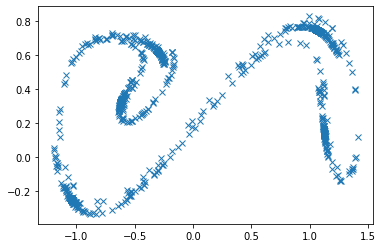

In [12]:
plt.plot(data_array[1:,3], data_array[1:,4], 'x')

Simple keras deep net implementation to try to predict (x,v) at time t

Create the Network:

Plotting the Time Series:

<function matplotlib.pyplot.show(close=None, block=None)>

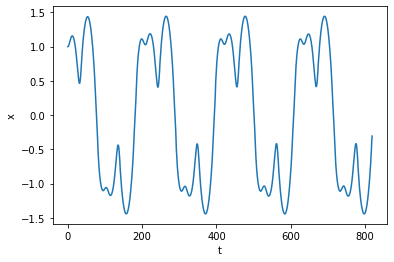

In [16]:
# Plotting the Time Series

plt.plot(x1)
plt.xlabel('t')
plt.ylabel('x')
plt.show

Setting up the Duffing Oscillator to generate training data for the NNs:

An attempt at implementing the UniCORNN without CUDA: Working from: https://github.com/tk-rusch/unicornn/blob/main/IMDB/network.py.


Understanding UnICORNN

In [5]:
import torch
import torch.nn as nn
from torch.autograd import Function
from torch.nn import Parameter
# from cupy.cuda import function
from pynvrtc.compiler import Program
from collections import namedtuple

ModuleNotFoundError: No module named 'cupy'

In [9]:
UnICORNN_CODE = """
extern "C" {
    __forceinline__ __device__ float sigmoid(float x)
    {
        return (float) 1./(1.+exp(-x));
    }
    __forceinline__ __device__ float sigmoid_grad(float x)
    {
        return (float) exp(-x)/((1.+exp(-x))*(1.+exp(-x)));
    }
    __forceinline__ __device__ float activation(float x)
    {
        return (float)tanh(x);
    }
    __forceinline__ __device__ float calc_grad_activation(float x)
    {
        return (float)1/(cosh(x)*cosh(x));
    }
    __global__ void unicornn_fwd( const float * __restrict__ x,
                            const float * __restrict__ weight_hh, const float * __restrict__ hy_initial,
                            const float * __restrict__ hz_initial, float * __restrict__ hy_final,
                            float * __restrict__ hz_final,
                            const int len, const int batch, const int hidden_size, const float * __restrict__ c, 
                            double dt, double alpha,
                            float * __restrict__ hy_all)
    {
        int ncols = batch*hidden_size;
        int col = blockIdx.x * blockDim.x + threadIdx.x;
        if (col >= ncols) return;       
        const float weight_hh_cur = *(weight_hh + (col%hidden_size));
        const float c_cur = *(c + (col%hidden_size));
        float hy = *(hy_initial + col);
        float hz = *(hz_initial + col);
        const float *xp = x+col;
        float *hy_all_p = hy_all+col;
        for (int row = 0; row < len; ++row)
        {
            hz -= dt*sigmoid(c_cur)*(activation(hy*weight_hh_cur+(*xp))+alpha*hy);
            hy += dt*sigmoid(c_cur)*hz;
            *hy_all_p = hy;
            xp += ncols;
            hy_all_p += ncols;
        }
        *(hy_final + col) = hy;
        *(hz_final + col) = hz;
    }
    __global__ void unicornn_bwd(const float * __restrict__ x,
                             const float * __restrict__ weight_hh, const float * __restrict__ hy_final, 
                             const float * __restrict__ hz_final,
                            const float * __restrict__ grad_h, 
                            const int len, const int batch, const int hidden_size, const float * __restrict__ c, 
                            double dt, double alpha, float * __restrict__ grad_x,
                            float * __restrict__ grad_weight_hh, float * __restrict__ grad_c)
    {    
        int ncols = batch*hidden_size;
        int col = blockIdx.x * blockDim.x + threadIdx.x;
        if (col >= ncols) return;        
        const float weight_hh_cur = *(weight_hh + (col%hidden_size));
        const float c_cur = *(c + (col%hidden_size));
        float gweight_hh = 0;
        float gc = 0;
        const float *xp = x+col + (len-1)*ncols;     
        float *gxp = grad_x + col + (len-1)*ncols;
        const float *ghp = grad_h + col + (len-1)*ncols;
        float delta_z = 0;
        float delta_y = (*ghp);        
        float delta_dt = 0;
        float hy = *(hy_final + col);
        float hz = *(hz_final + col);
        for (int row = len-1; row >= 0; --row)
        {   
            delta_dt = delta_y*dt*sigmoid_grad(c_cur)*hz;
            // reconstruct hidden states based on the final hidden state using adjoint symplectic Euler:
            hy=hy-dt*sigmoid(c_cur)*hz;
            hz=hz+dt*sigmoid(c_cur)*(activation(hy*weight_hh_cur+(*xp))+alpha*hy);
            delta_z += delta_y*dt*sigmoid(c_cur);
            gweight_hh -= delta_z*dt*sigmoid(c_cur)*calc_grad_activation(hy*weight_hh_cur+(*xp))*hy;
            gc += delta_dt-delta_z*(dt*sigmoid_grad(c_cur)*(activation(hy*weight_hh_cur+(*xp))+alpha*hy));
            *gxp = -delta_z*dt*sigmoid(c_cur)*calc_grad_activation(hy*weight_hh_cur+(*xp));
            if(row==0)break;
            ghp -= ncols;
            delta_y += -delta_z*dt*sigmoid(c_cur)*(calc_grad_activation(hy*weight_hh_cur+(*xp))*weight_hh_cur+alpha) + (*ghp);
            xp -= ncols;
            gxp -= ncols;
        }
        atomicAdd(grad_weight_hh + (col%hidden_size), gweight_hh);
        atomicAdd(grad_c + (col%hidden_size), gc);
    }
}
"""

In [4]:
class UnICORNN_compile():
    _UnICORNN_PROG = Program(UnICORNN_CODE, 'unicornn_prog.cu')
    _UnICORNN_PTX = _UnICORNN_PROG.compile()
    _DEVICE2FUNC = {}

    def __init__(self):
        super(UnICORNN_compile, self).__init__()

    def compile_functions(self):
        # device = torch.cuda.current_device()
        mod = function.Module()
        mod.load(bytes(self._UnICORNN_PTX.encode()))
        fwd_func = mod.get_function('unicornn_fwd')
        bwd_func = mod.get_function('unicornn_bwd')

        Stream = namedtuple('Stream', ['ptr'])
        current_stream = Stream(ptr=torch.cuda.current_stream().cuda_stream)

        self._DEVICE2FUNC[device] = (current_stream, fwd_func, bwd_func)
        return current_stream, fwd_func, bwd_func

    def get_functions(self):
        res = self._DEVICE2FUNC.get(torch.cuda.current_device(), None)
        return res if res else self.compile_functions()

NameError: name 'Program' is not defined

In [ ]:
class UnICORNN_Compute_GPU(Function):
    @staticmethod
    def forward(ctx, x, weight_hh, hy_initial, hz_initial, c, alpha, dt):
        comp = UnICORNN_compile()
        length = x.size(0) if x.dim() == 3 else 1
        batch = x.size(-2)
        hidden_size = x.size(-1)
        ncols = batch * hidden_size
        thread_per_block = min(512, ncols)
        num_block = (ncols - 1) // thread_per_block + 1

        size = (length, batch, hidden_size) if x.dim() == 3 else (batch, hidden_size)
        hy_all = x.new(*size)

        hy_final = x.new(batch, hidden_size)
        hz_final = x.new(batch, hidden_size)

        stream, fwd_func, _ = comp.get_functions()
        FUNC = fwd_func
        FUNC(args=[
            x.contiguous().data_ptr(),
            weight_hh.contiguous().data_ptr(),
            hy_initial.contiguous().data_ptr(),
            hz_initial.contiguous().data_ptr(),
            hy_final.contiguous().data_ptr(),
            hz_final.contiguous().data_ptr(),
            length,
            batch,
            hidden_size,
            c.contiguous().data_ptr(),
            dt.item(),
            alpha.item(),
            hy_all.contiguous().data_ptr()],
            block=(thread_per_block, 1, 1), grid=(num_block, 1, 1),
            stream=stream
        )

        ctx.save_for_backward(x, weight_hh, hy_final, hz_final, c, alpha, dt)
        return hy_all


In [ ]:
    @staticmethod
    def backward(ctx, grad_h):
        x, weight_hh, hy_final, hz_final, c, alpha, dt = ctx.saved_tensors
        comp = UnICORNN_compile()
        length = x.size(0) if x.dim() == 3 else 1
        batch = x.size(-2)
        hidden_size = x.size(-1)
        ncols = batch * hidden_size
        thread_per_block = min(256, ncols)
        num_block = (ncols - 1) // thread_per_block + 1

        grad_x = x.new(*x.size())
        grad_weight_hh = x.new(hidden_size).zero_()
        grad_c = x.new(hidden_size).zero_()

        stream, _, bwd_func = comp.get_functions()
        FUNC = bwd_func
        FUNC(args=[
            x.contiguous().data_ptr(),
            weight_hh.contiguous().data_ptr(),
            hy_final.contiguous().data_ptr(),
            hz_final.contiguous().data_ptr(),
            grad_h.contiguous().data_ptr(),
            length,
            batch,
            hidden_size,
            c.contiguous().data_ptr(),
            dt.item(),
            alpha.item(),
            grad_x.contiguous().data_ptr(),
            grad_weight_hh.contiguous().data_ptr(),
            grad_c.contiguous().data_ptr()],
            block=(thread_per_block, 1, 1), grid=(num_block, 1, 1),
            stream=stream
        )

        return grad_x, grad_weight_hh, None, None, grad_c, None, None

In [ ]:

class UnICORNN_recurrence(nn.Module):
    def __init__(self, hidden_size, dt, alpha):
        super(UnICORNN_recurrence, self).__init__()
        self.hidden_size = hidden_size
        self.dt = torch.tensor(dt)
        self.c_ = Parameter(torch.Tensor(hidden_size))
        self.alpha = torch.tensor(alpha)
        self.weight_hh = Parameter(torch.Tensor(hidden_size))
        self.reset_parameters()

    def reset_parameters(self):
        for name, weight in self.named_parameters():
            if "weight_hh" in name:
                nn.init.uniform_(weight, a=0, b=1)
            if "c_" in name:
                nn.init.uniform_(weight, a=-0.1, b=0.1)

    def forward(self, input):
        hy0, hz0 = input.data.new(input.size(-2), input.size(-1)).zero_(), input.data.new(input.size(-2),
                                                                                          input.size(-1)).zero_()
        return UnICORNN_Compute_GPU.apply(input, self.weight_hh, hy0, hz0, self.c_, self.alpha, self.dt)

In [ ]:

def embedded_dropout(embed, words, dropout=0.1, scale=None):
  if dropout:
    mask = embed.weight.data.new().resize_((embed.weight.size(0), 1)).bernoulli_(1 - dropout).expand_as(embed.weight) / (1 - dropout)
    masked_embed_weight = mask * embed.weight
  else:
    masked_embed_weight = embed.weight
  if scale:
    masked_embed_weight = scale.expand_as(masked_embed_weight) * masked_embed_weight

  padding_idx = embed.padding_idx
  if padding_idx is None:
      padding_idx = -1

  X = torch.nn.functional.embedding(words, masked_embed_weight,
    padding_idx, embed.max_norm, embed.norm_type,
    embed.scale_grad_by_freq, embed.sparse
  )
  return X

In [ ]:
class Dropout_overtime(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, p=0.5, training=False):
        output = input.clone()
        noise = input.data.new(input.size(-2), input.size(-1))
        if training:
            noise.bernoulli_(1 - p).div_(1 - p)
            noise = noise.unsqueeze(0).expand_as(input)
            output.mul_(noise)
        ctx.save_for_backward(noise)
        ctx.training = training
        return output

    @staticmethod
    def backward(ctx, grad_output):
        noise, = ctx.saved_tensors
        if ctx.training:
            return grad_output.mul(noise), None, None
        else:
            return grad_output, None, None
dropout_overtime=Dropout_overtime.apply

In [ ]:
class Linear_overtime(nn.Module):
    def __init__(self, input_size, hidden_size,bias=True):
        super(Linear_overtime, self).__init__()
        self.fc = nn.Linear(input_size, hidden_size, bias=bias)
        self.input_size = input_size
        self.hidden_size = hidden_size

    def forward(self, x):
        y = x.contiguous().view(-1, self.input_size)
        y = self.fc(y)
        y = y.view(x.size()[0], x.size()[1], self.hidden_size)
        return y

In [ ]:
class UnICORNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, nhid, nout, pad_idx, dt, alpha, nlayers, drop=0.1, drop_emb=0.1):
        super(UnICORNN, self).__init__()
        self.nhid = nhid
        self.nlayers = nlayers
        self.drop = drop
        self.drop_emb = drop_emb
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.DIs = nn.ModuleList()
        denseinput = Linear_overtime(embedding_dim, nhid)
        self.DIs.append(denseinput)
        for x in range(self.nlayers - 1):
            denseinput = Linear_overtime(nhid, nhid)
            self.DIs.append(denseinput)
        self.classifier = nn.Linear(nhid, nout)
        self.init_weights()
        self.RNNs = []
        for x in range(self.nlayers):
            rnn = UnICORNN_recurrence(nhid, dt[x], alpha)
            self.RNNs.append(rnn)
        self.RNNs = torch.nn.ModuleList(self.RNNs)

    def init_weights(self):
      for name, param in self.named_parameters():
        if ('fc' in name) and 'weight' in name:
            nn.init.kaiming_uniform_(param, a=8, mode='fan_in')#
        if 'classifier' in name and 'weight' in name:
            nn.init.kaiming_normal_(param.data)
        if 'bias' in name:
            param.data.fill_(0.0)

    def forward(self, input):
        rnnoutputs = {}
        seqlen = input.size(0)
        batchsize = input.size(1)
        input = input.view(seqlen * batchsize)
        input = embedded_dropout(self.embedding, input, dropout=self.drop_emb if self.training else 0)
        rnnoutputs['outlayer-1'] = input.view(seqlen, batchsize, self.embedding_dim)
        for x in range(len(self.RNNs)):
            rnnoutputs['dilayer%d' % x] = self.DIs[x](rnnoutputs['outlayer%d' % (x - 1)])
            rnnoutputs['outlayer%d' % x] = self.RNNs[x](rnnoutputs['dilayer%d' % x])
            rnnoutputs['outlayer%d' % x] = dropout_overtime(rnnoutputs['outlayer%d' % x], self.drop, self.training)
        temp = rnnoutputs['outlayer%d' % (len(self.RNNs) - 1)][-1]
        output = self.classifier(temp)
        return output